# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [56]:
pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [57]:
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [58]:
data = pd.get_dummies(penguins, columns=['species', 'island', 'sex'])
#data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [59]:
data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year',
                          'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
                          'island_Biscoe', 'island_Dream', 'island_Torgersen',
                          'sex_female', 'sex_male']]
#data

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [60]:
lr = LinearRegression()

Linear Regression

In [61]:
data = data.dropna()
y = data['bill_depth_mm']
X = data[['bill_length_mm']]

In [62]:
lr_fit = lr.fit(X, y)
data["lrpredict"] = lr_fit.predict(X)
lr_fit.coef_
#data

array([-0.08502128])

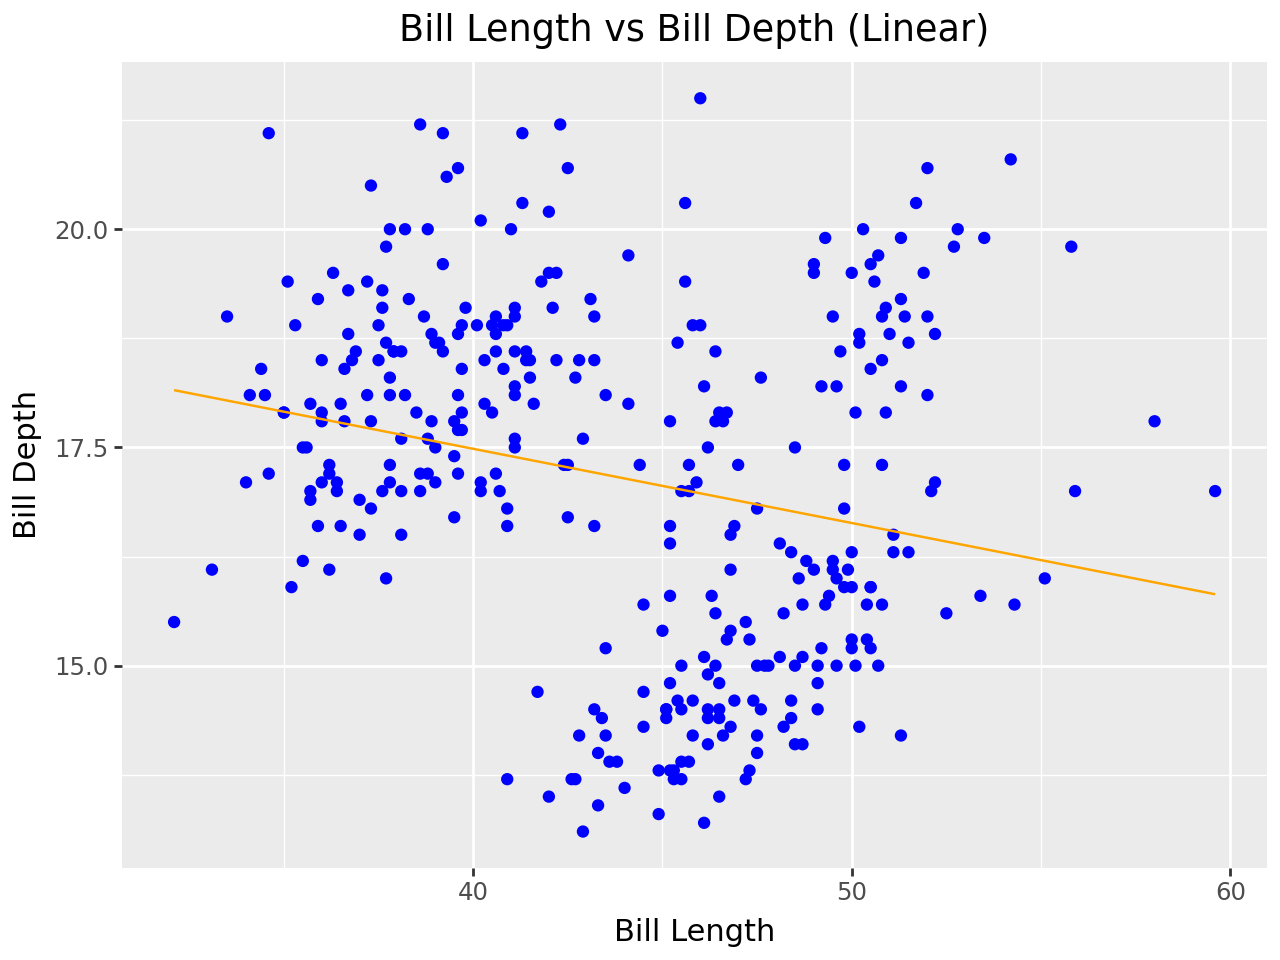

In [63]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color="blue") + 
    geom_line(aes(y='lrpredict'), color="orange") + 
    labs(
        title="Bill Length vs Bill Depth (Linear)",
        x="Bill Length",
        y="Bill Depth"
    )
)

quadratic

In [64]:
data['quadratic'] = data['bill_length_mm']**2
Xquad = data[['bill_length_mm', 'quadratic']]

In [65]:
lr_fitquad = lr.fit(Xquad, y)
data["lrpredictquad"] = lr_fitquad.predict(Xquad)
lr_fit.coef_
#data

array([-1.42149289,  0.0151644 ])

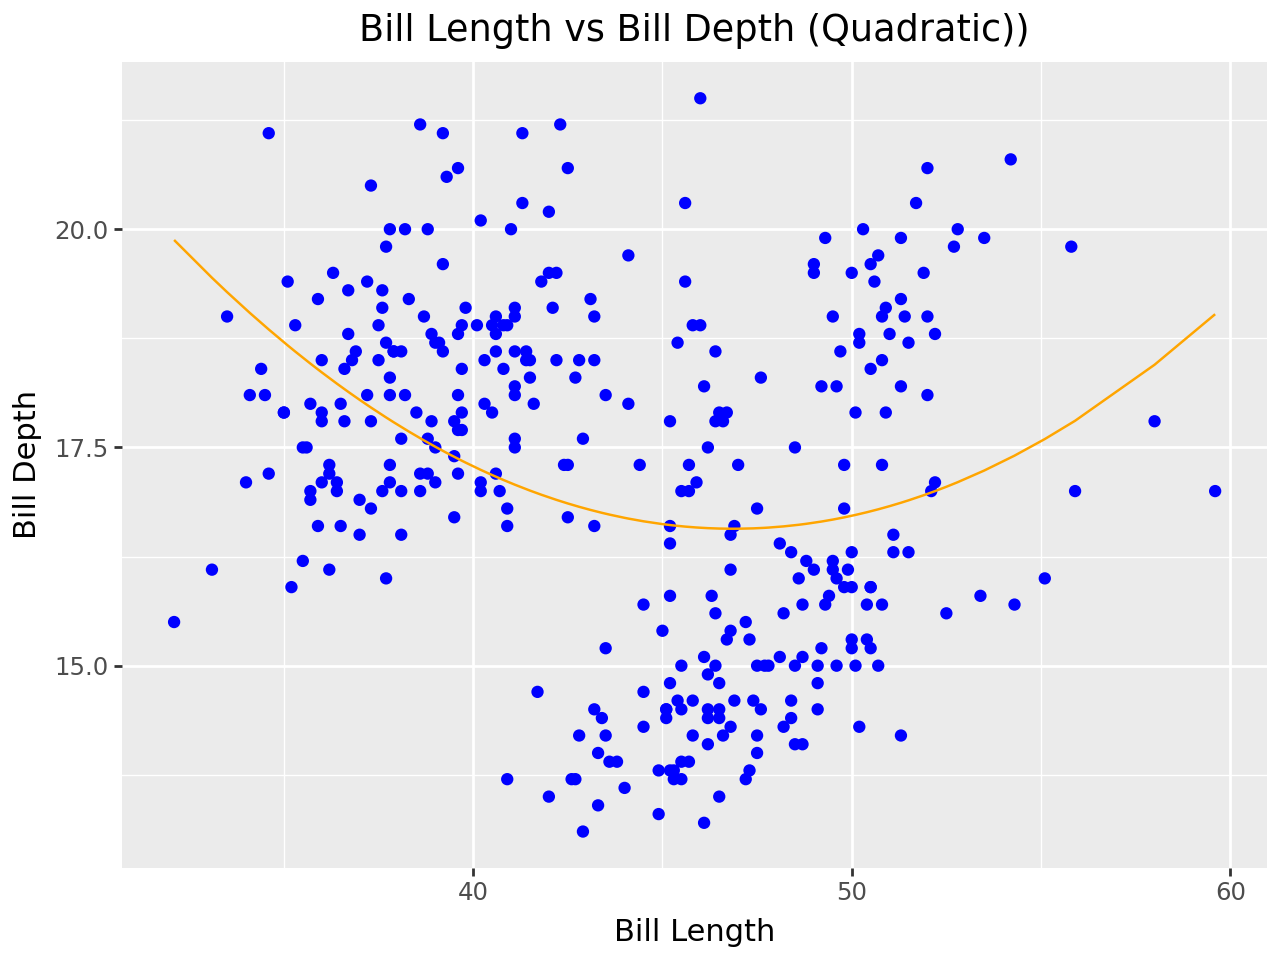

In [66]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color="blue") +  
    geom_line(aes(y='lrpredictquad'), color="orange") +  
    labs(
        title="Bill Length vs Bill Depth (Quadratic))",
        x="Bill Length",
        y="Bill Depth"
    )
)

cubic

In [67]:
data['cubic'] = data['bill_length_mm']**3
Xcube = data[['bill_length_mm', 'quadratic', 'cubic']]

In [68]:
lr_fitcube = lr.fit(Xcube, y)
data["lrpredictcube"] = lr_fitcube.predict(Xcube)
lr_fitcube.coef_
#data

array([ 7.00494111e+00, -1.74355549e-01,  1.40554271e-03])

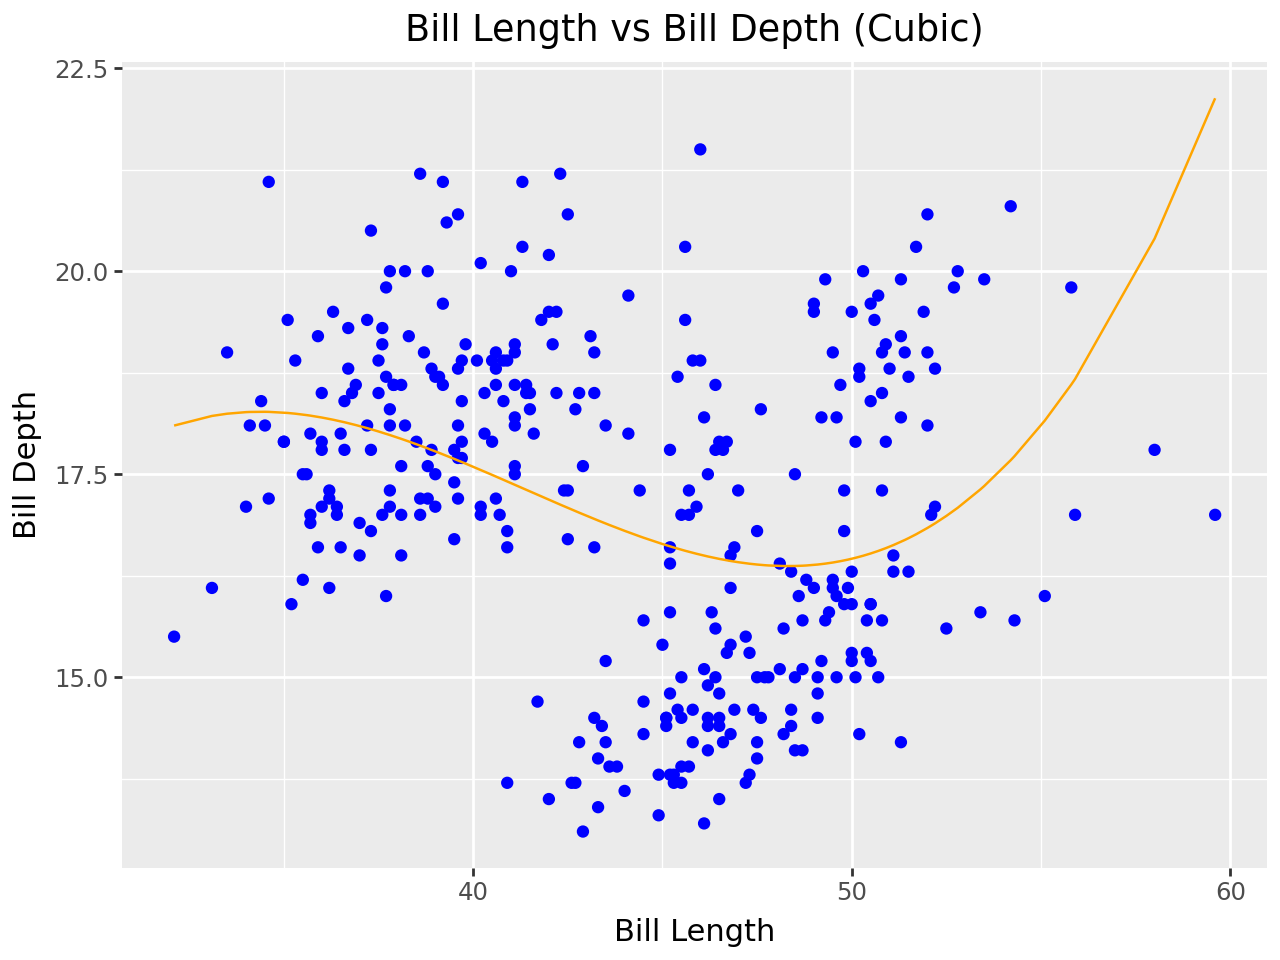

In [69]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color="blue") +  
    geom_line(aes(y='lrpredictcube'), color="orange") + 
    labs(
        title="Bill Length vs Bill Depth (Cubic)",
        x="Bill Length",
        y="Bill Depth"
    )
)

degree 10

In [70]:
data['Quartic'] = data['bill_length_mm']**4
data['Quintic'] = data['bill_length_mm']**5
data['Sextic'] = data['bill_length_mm']**6
data['Septic'] = data['bill_length_mm']**7
data['Octic'] = data['bill_length_mm']**8
data['Nonic'] = data['bill_length_mm']*9
data['Decic'] = data['bill_length_mm']**10
XDecic = data[['bill_length_mm', 'quadratic', 'cubic', 'Quartic', 'Quintic', 'Sextic', 'Septic', 'Octic', 'Nonic', 'Decic']]

In [71]:
lr_fitdecic = lr.fit(XDecic, y)
data["lrpredictdecic"] = lr_fitdecic.predict(XDecic)
lr_fitdecic.coef_

array([-1.50510952e-06, -3.94998921e-05, -9.85652904e-04, -1.00456067e-02,  8.81347738e-04, -3.09963845e-05,  5.25121342e-07, -3.78821956e-09, -1.35459857e-05,
        9.46291250e-14])

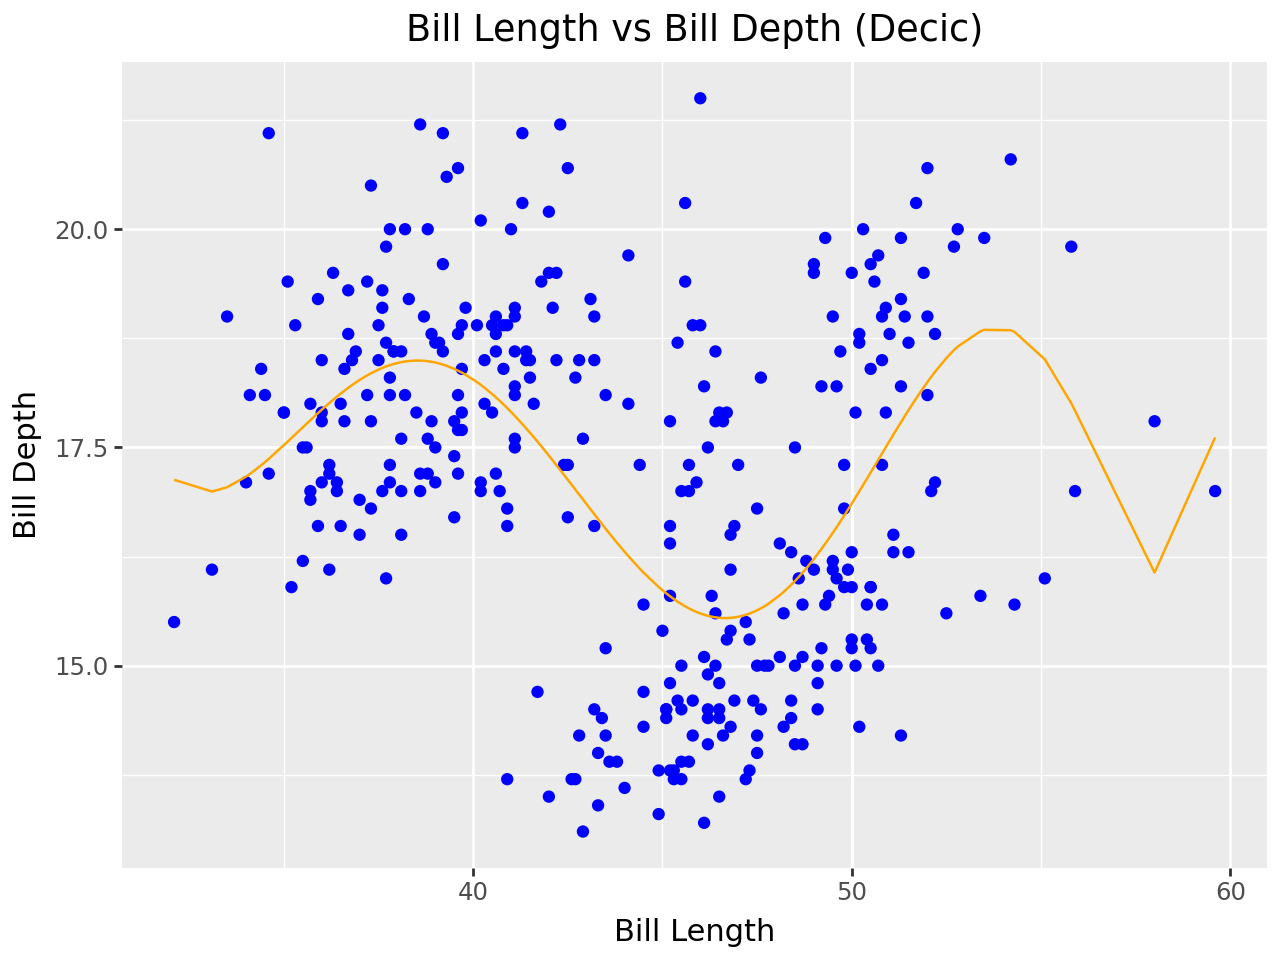

In [72]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(color="blue") +  
    geom_line(aes(y='lrpredictdecic'), color="orange") +  
    labs(
        title="Bill Length vs Bill Depth (Decic)",
        x="Bill Length",
        y="Bill Depth"
    )
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
XQ_train, XQ_test, yQ_train, yQ_test = train_test_split(Xquad, y, test_size=0.25)
XD_train, XD_test, yD_train, yD_test = train_test_split(XDecic, y, test_size=0.25)


In [74]:
lr = LinearRegression()

In [75]:
lr_fit1 = lr.fit(X_train, y_train)
y_pred_lr = lr_fit1.predict(X_test)
y_pred_lrT = lr_fit1.predict(X_train)

msetest = mean_squared_error(y_test, y_pred_lr)
msetrain = mean_squared_error(y_train, y_pred_lrT)
R2test = r2_score(y_test, y_pred_lr)
R2train = r2_score(y_train, y_pred_lrT)

print(msetrain)
print(msetest)
print(R2train)
print(R2test)

3.6924242775104523
3.6447377852171554
0.037995049970651285
0.09653579943338164
3.6924242775104523
3.6447377852171554
0.037995049970651285
0.09653579943338164


In [76]:
lr_fitQ = lr.fit(XQ_train, yQ_train)
y_pred_lrQ = lr_fitQ.predict(XQ_test)
y_pred_lrQT = lr_fitQ.predict(XQ_train)

msetestQ = mean_squared_error(yQ_test, y_pred_lrQ)
msetrainQ = mean_squared_error(yQ_train, y_pred_lrQT)
R2testQ = r2_score(yQ_test, y_pred_lrQ)
R2trainQ = r2_score(yQ_train, y_pred_lrQT)

print(msetrainQ)
print(msetestQ)
print(R2trainQ)
print(R2testQ)

3.5838500064184284
3.06278126254265
0.1202207066462907
0.08220341637361217
3.5838500064184284
3.06278126254265
0.1202207066462907
0.08220341637361217


In [77]:
lr_fitD = lr.fit(XD_train, yD_train)
y_pred_lrD = lr_fitD.predict(XD_test)
y_pred_lrDT = lr_fitD.predict(XD_train)

msetestD = mean_squared_error(yD_test, y_pred_lrD)
msetrainD = mean_squared_error(yD_train, y_pred_lrDT)
R2testD = r2_score(yD_test, y_pred_lrD)
R2trainD = r2_score(yD_train, y_pred_lrDT)

print(msetrainD)
print(msetestD)
print(R2trainD)
print(R2testD)

2.6959000108894124
3.4410233237250676
0.32782172746163096
0.018420339013144327
2.6959000108894124
3.4410233237250676
0.32782172746163096
0.018420339013144327


Are any of the models above underfitting the data? If so, which ones and how can you tell?
The first model is underfitting the data, for both train and test the R^2 is less than 6%
Are any of the models above overfitting the data? If so, which ones and how can you tell?
The second model is overfitting the model since the test R^2 is good but the train R^2 is very low

The second model is overfitting the data
Which of the above models do you think fits the data best and why?
The decic model fits the data the best, it has a high R^2 for test and train as well as a low RMSE for test and train